# CSK vs MI

In [1]:
#import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
#import data
deliveries = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches.csv')


# Q1. Who will win the match? (CSK / MI)

In [3]:
#checking total matches played by rr
matches_rr = matches[(matches['team1']=='Rajasthan Royals')|(matches['team2']=='Rajasthan Royals')]

wins_rr = np.sum(matches_rr.winner == 'Rajasthan Royals')

print("Total matches played by rr:", matches_rr.shape[0])
print("Total matches won by rr:", wins_rr)
print("rr winning percentage:", (wins_rr/matches_rr.shape[0]*100))

Total matches played by rr: 147
Total matches won by rr: 75
rr winning percentage: 51.02040816326531


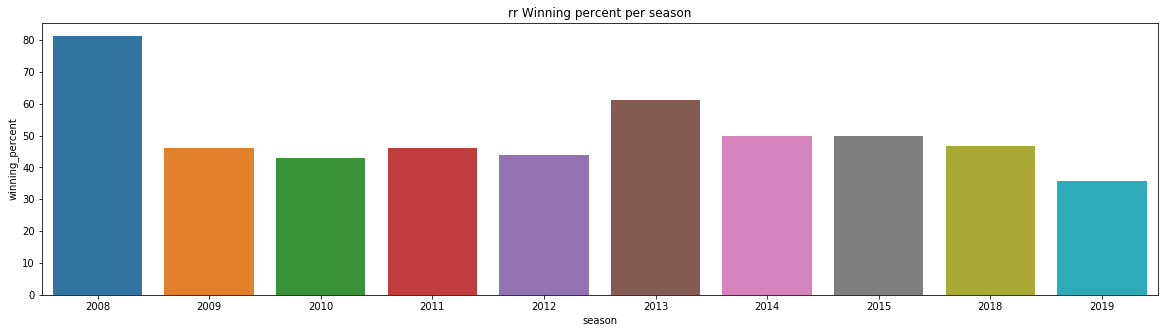

In [4]:
#checking rr matches winning percentage per season

rr_wins = matches_rr[matches_rr.winner == 'Rajasthan Royals']
# matches['season'].unique()
rr_season_wins = rr_wins.groupby('season')['winner'].count().reset_index()
rr_season_wins['total_matches_rr']=matches_rr.groupby('season')['id'].count().values
rr_season_wins['winning_percent']= (rr_season_wins.winner/rr_season_wins.total_matches_rr)*100

plt.figure(figsize=(20,5))
sns.barplot(x=rr_season_wins['season'], y = rr_season_wins['winning_percent'])
plt.title("rr Winning percent per season")
plt.show()

In [5]:
#checking total matches played by mi
matches_mi = matches[(matches['team1']=='Mumbai Indians')|(matches['team2']=='Mumbai Indians')]

wins_mi = np.sum(matches_mi.winner == 'Mumbai Indians')

print("Total matches played by mi:", matches_mi.shape[0])
print("Total matches won by mi:", wins_mi)
print("mi winning percentage:", (wins_mi/matches_mi.shape[0]*100))

Total matches played by mi: 187
Total matches won by mi: 109
mi winning percentage: 58.288770053475936


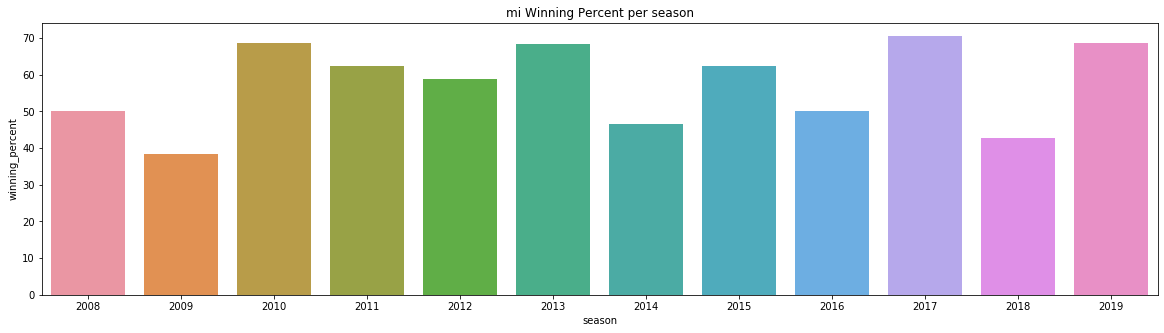

In [6]:
#checking Mumbai Indians matches winning percentage per season

mi_wins = matches_mi[matches_mi.winner == 'Mumbai Indians']
# matches['season'].unique()
mi_season_wins = mi_wins.groupby('season')['winner'].count().reset_index()
mi_season_wins['total_matches_mi']=matches_mi.groupby('season')['id'].count().values
mi_season_wins['winning_percent']= (mi_season_wins.winner/mi_season_wins.total_matches_mi)*100

plt.figure(figsize=(20,5))
sns.barplot(x=mi_season_wins['season'], y = mi_season_wins['winning_percent'])
plt.title('mi Winning Percent per season')
plt.show()

In [7]:
#checking matches between 'rr' and 'mi'
matches_rr_mi = matches[((matches['team1']=='Rajasthan Royals')&(matches['team2']=='Mumbai Indians'))|((matches['team2']=='Rajasthan Royals')&(matches['team1']=='Mumbai Indians'))]
# matches_rr_mi.head()

season  winner          
2008    Mumbai Indians       50.000000
        Rajasthan Royals     50.000000
2009    Rajasthan Royals    100.000000
2010    Mumbai Indians      100.000000
2011    Rajasthan Royals    100.000000
2012    Mumbai Indians      100.000000
2013    Mumbai Indians       66.666667
        Rajasthan Royals     33.333333
2014    Mumbai Indians      100.000000
2015    Mumbai Indians       50.000000
        Rajasthan Royals     50.000000
2018    Rajasthan Royals    100.000000
2019    Rajasthan Royals    100.000000
Name: winner, dtype: float64

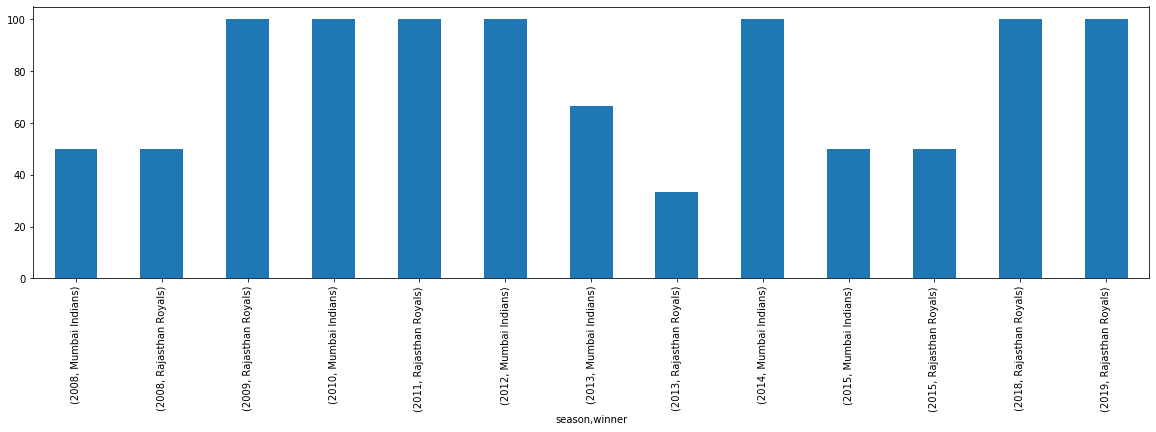

In [8]:
#Now lets see how rr has performed over mi


res = matches_rr_mi.groupby('season')['winner'].value_counts(normalize=True)*100
display(res)

plt.figure(figsize=(20,5))
res.plot(kind='bar')
plt.show()

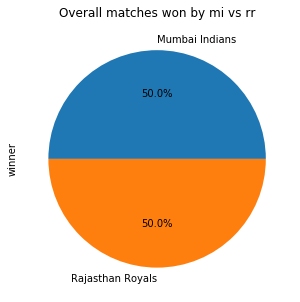

In [9]:
# checking  overall matches won by mi and rr
plt.title("Overall matches won by mi vs rr")
matches_rr_mi.winner.value_counts().plot('pie', autopct='%1.1f%%', figsize=(20,5))
plt.show()

**Inference:**
    - Data indicates both teams have equal chances of winning percent . However in 2020 season MI is stronger team. so lets go with MI.

# Q2. How many runs will Quinton De Kock score off boundaries in the first 10 balls he faces? If he doesnt face 10 balls and gets out before, then the number of runs he scored off boundaries until the point he got out will be considered?
    - Less than 10
    - 10-14
    - 15-20
    - 21 or more

In [11]:
# get all matches when quniton de kock bats against CSK
qdkb_cskf = deliveries[(deliveries.batsman == 'Q de Kock')&(deliveries.bowling_team=='Chennai Super Kings')]

runs_first10=[]
for m in qdkb_cskf.match_id.unique():
      #getting first 10 balls if got out before balls until out
    df = (qdkb_cskf[qdkb_cskf.match_id == m][:10])
    
    #get only rows when scored off boundaries
    runs_first10.append(df[df.batsman_runs.isin([4,6])]['batsman_runs'].sum())


In [12]:
pd.DataFrame(runs_first10).describe()

,0
count,8.000000
mean,6.750000
std,4.399675
min,0.000000
25%,4.000000
50%,6.000000
75%,10.500000
max,12.000000


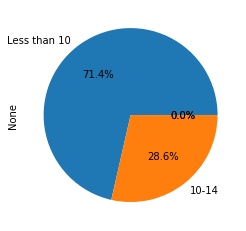

In [13]:
pd.cut(runs_first10, bins=[0,10,15,21,60], labels=['Less than 10', '10-14', '15-20', '21 or more']).value_counts().plot("pie", autopct='%1.1f%%')

**Inference:**
    - We can see that in most of matches he was caught out sooner however in first 10 balls on average he scored around 6 runs.

# Q3. What MI bowler will have the best dot balls to total balls bowled ratio?
    - Jasprit Bunrah
    - Rahul Chahar
    - Trent Boult
    - Others

In [14]:
#get all rows when MI bowls against CSK
mi_bowls_csk = deliveries[(deliveries.bowling_team=='Mumbai Indians')&(deliveries.batting_team=='Chennai Super Kings')]

mi_csk_tot_balls = mi_bowls_csk.groupby(['match_id', 'bowler'])['total_runs'].count().reset_index()
mi_csk_tot_balls = mi_csk_tot_balls.rename(columns={'total_runs': 'total_balls'})

mi_bowls_csk_dots = mi_bowls_csk[(mi_bowls_csk.total_runs==0)|(mi_bowls_csk.player_dismissed==np.nan)]
mi_bowls_csk_tot_dots = mi_bowls_csk_dots.groupby(['match_id', 'bowler'])['total_runs'].count().reset_index()
mi_bowls_csk_tot_dots = mi_bowls_csk_tot_dots.rename(columns={'total_runs': 'total_dots'})

mi_csk_balls_dots_all = mi_csk_tot_balls.merge(mi_bowls_csk_tot_dots, how='left', on=['match_id', 'bowler'])
mi_csk_balls_dots_all['dots_total_ratio'] = np.round(mi_csk_balls_dots_all['total_dots']/mi_csk_balls_dots_all['total_balls']*100, 2)
dots_ratios = mi_csk_balls_dots_all.sort_values(by=['match_id','dots_total_ratio'], ascending=False)

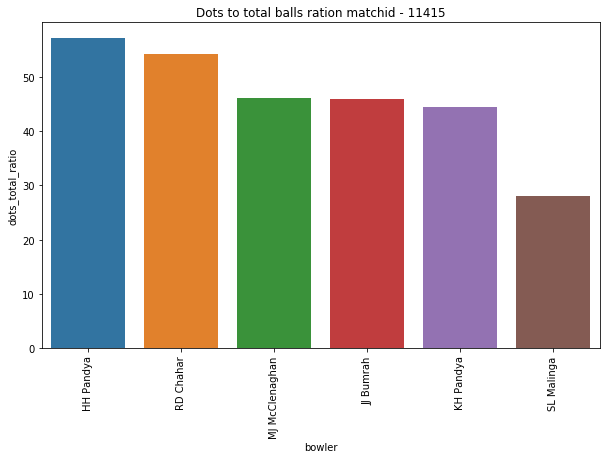

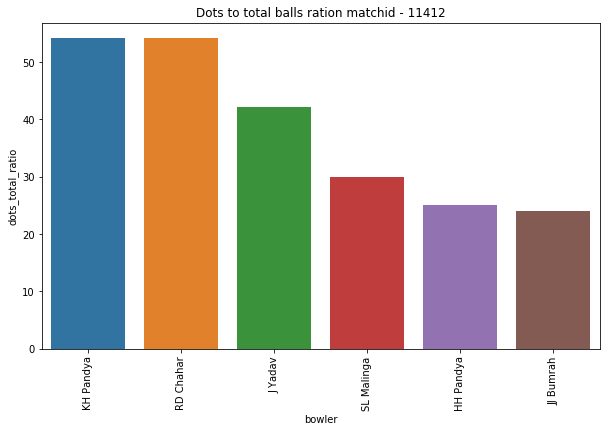

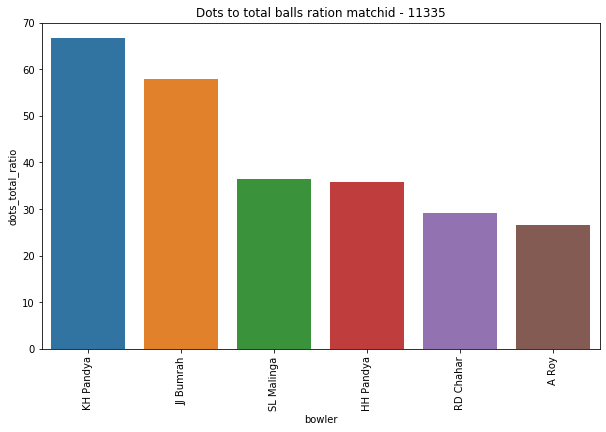

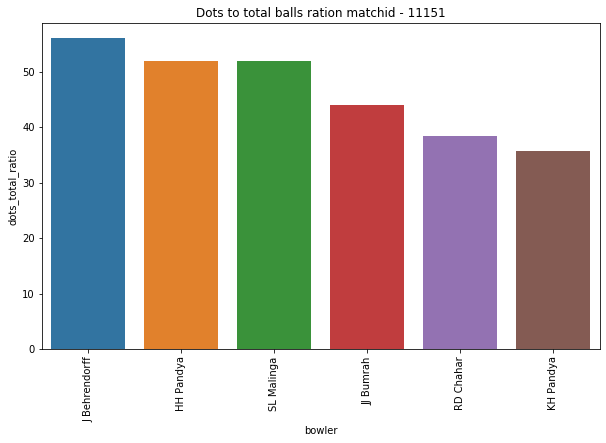

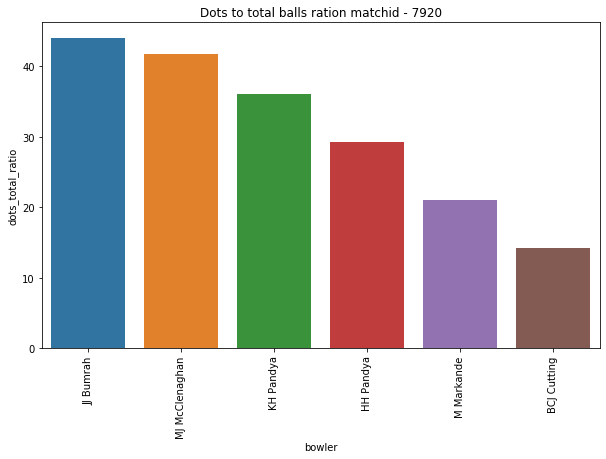

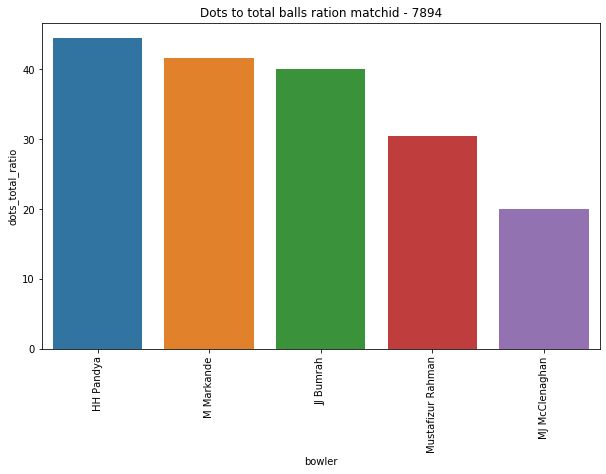

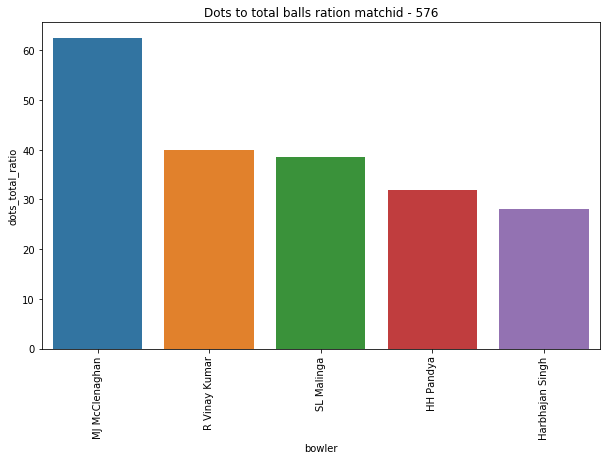

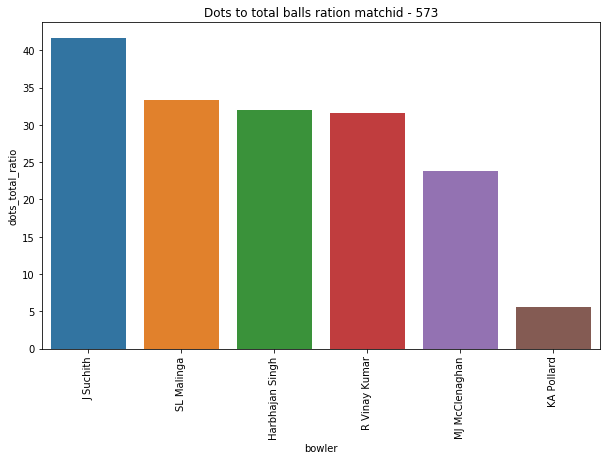

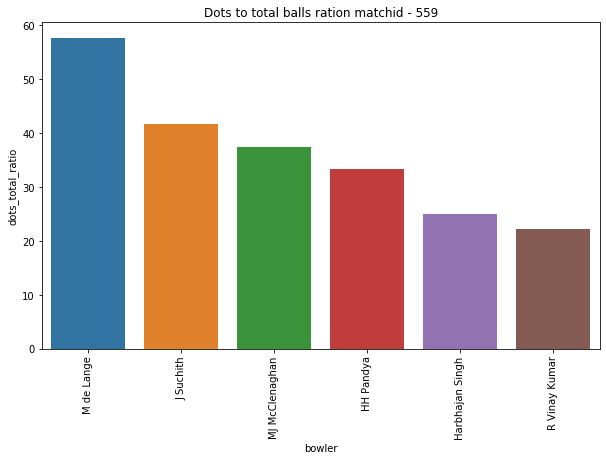

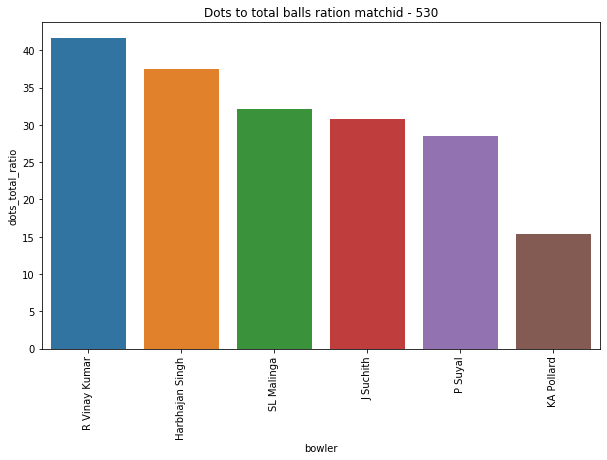

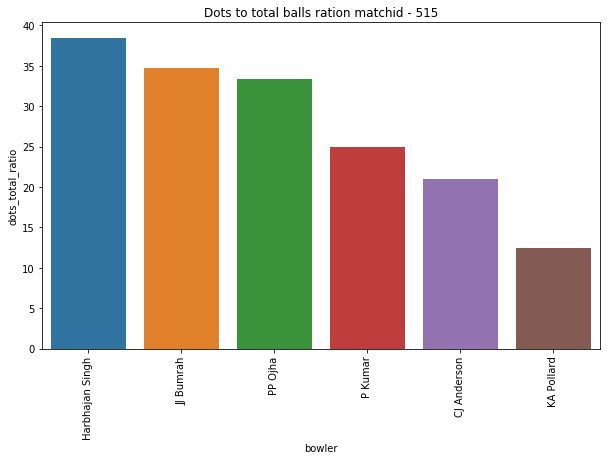

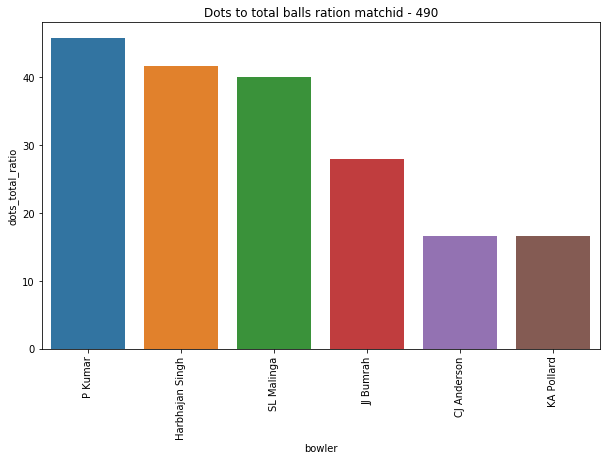

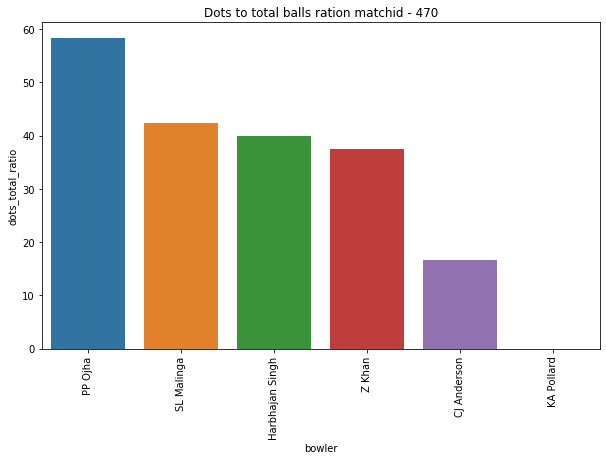

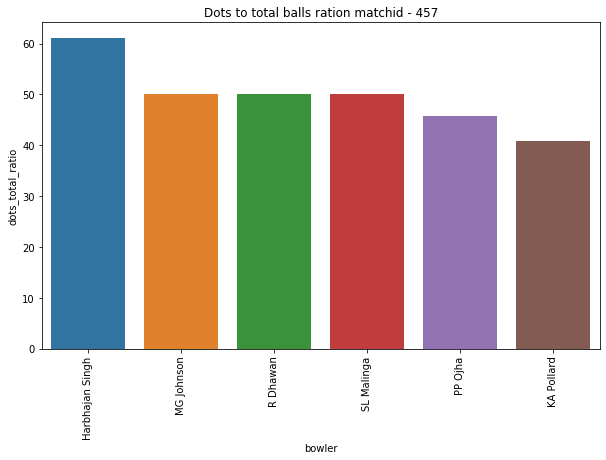

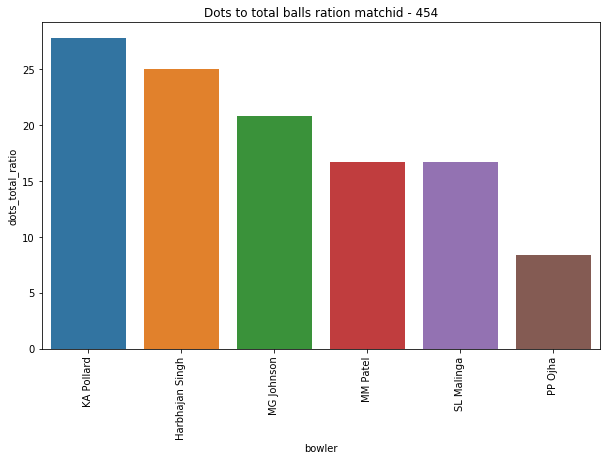

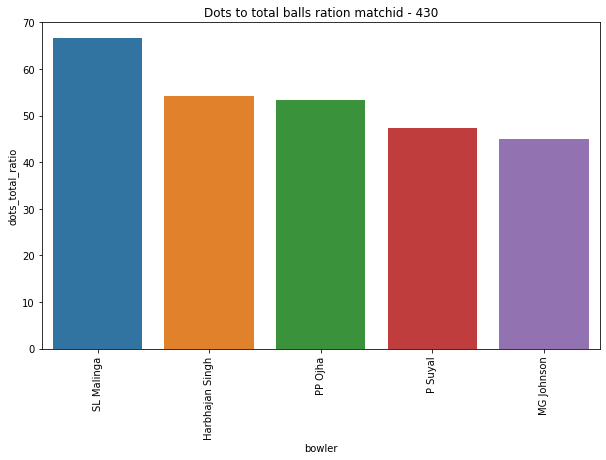

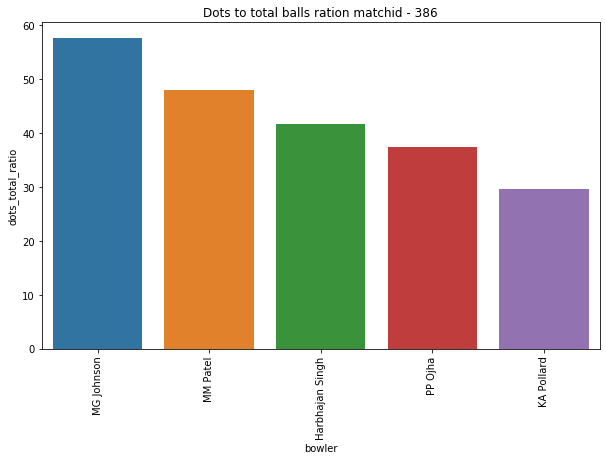

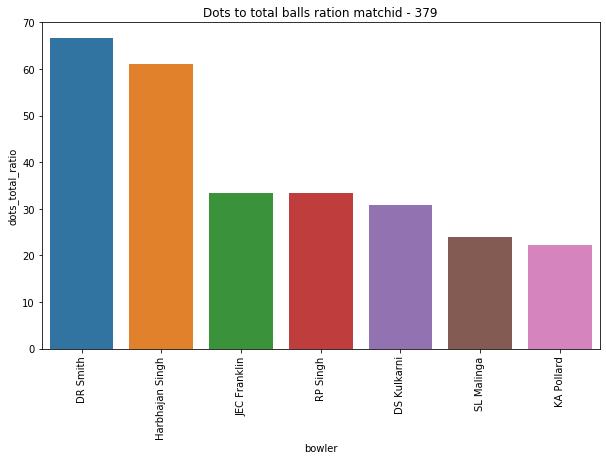

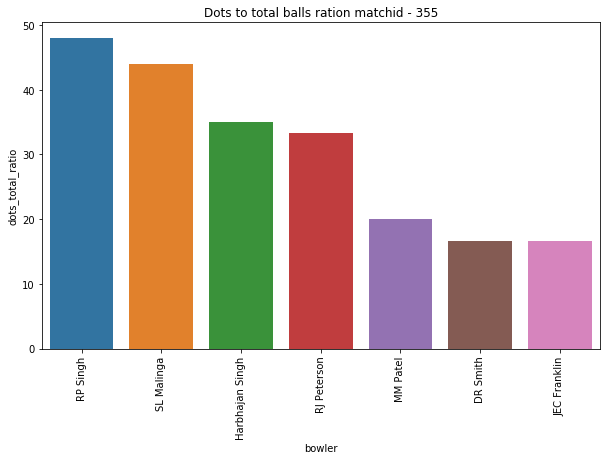

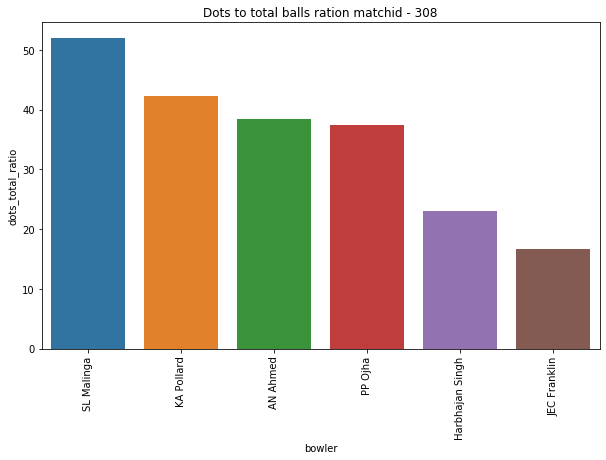

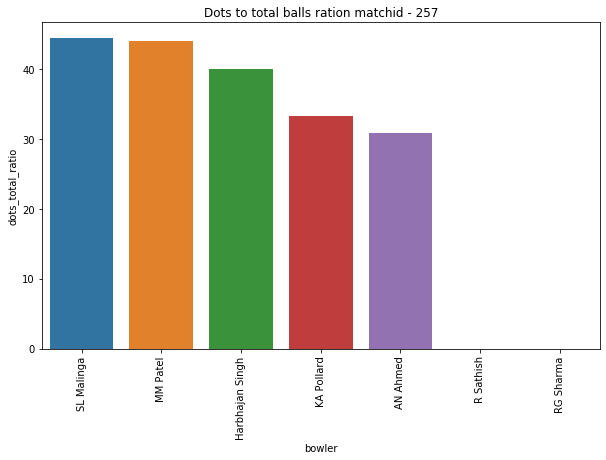

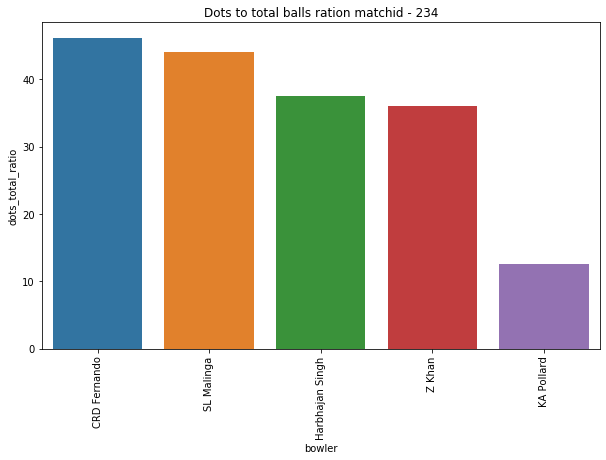

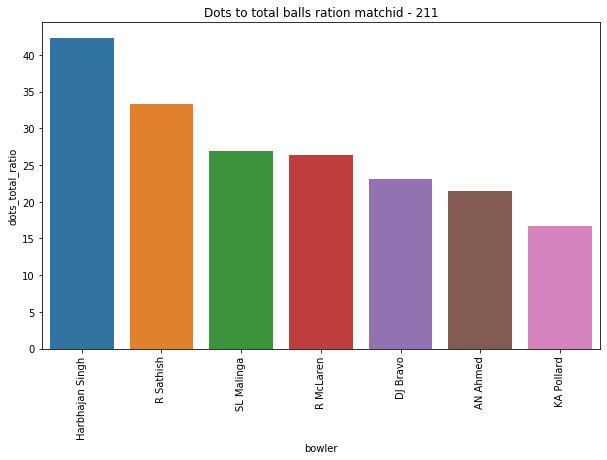

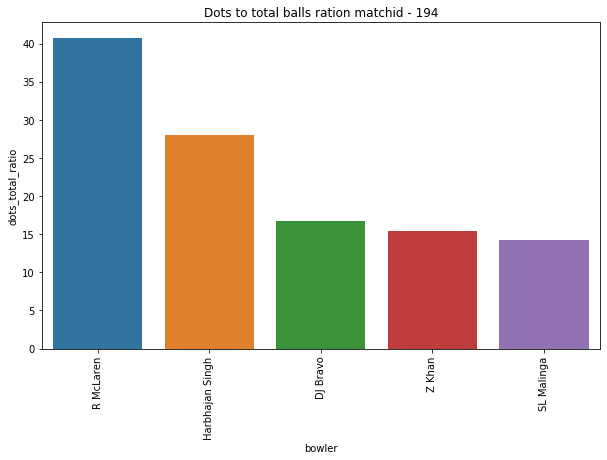

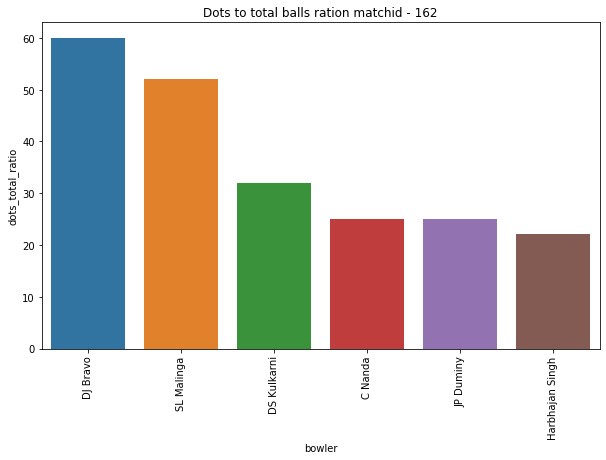

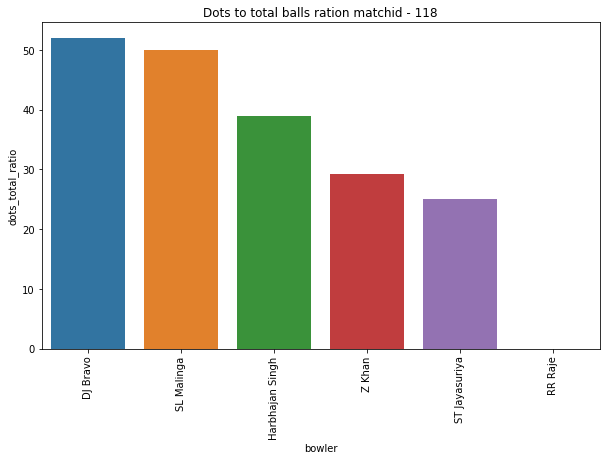

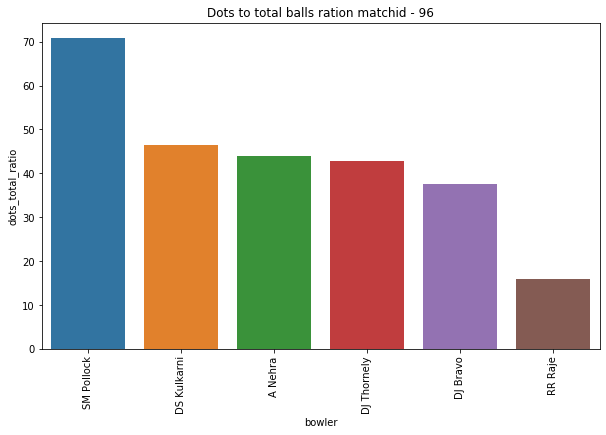

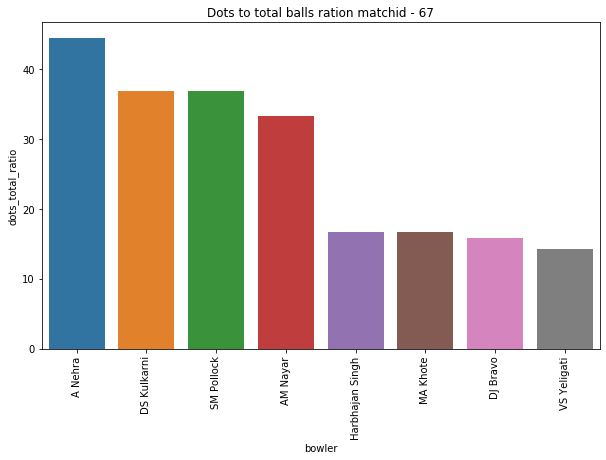

In [15]:
#checking visually
for m in dots_ratios.match_id.unique():
    df = dots_ratios[dots_ratios.match_id==m]
    
#     display(df)
    plt.figure(figsize=(10,6))
    sns.barplot(df['bowler'], df.dots_total_ratio)
    plt.xticks(rotation=90)
    plt.title("Dots to total balls ration matchid - "+str(m))
    plt.show()


In [16]:
dots_ratios.groupby('bowler')['dots_total_ratio'].describe().sort_values('mean', ascending=False).head(20)

,count,mean,std,min,25%,50%,75%,max
bowler,,,,,,,,
M de Lange,1.0,57.690000,NaN,57.69,57.6900,57.690,57.6900,57.69
J Behrendorff,1.0,56.000000,NaN,56.00,56.0000,56.000,56.0000,56.00
SM Pollock,2.0,53.835000,24.034559,36.84,45.3375,53.835,62.3325,70.83
R Dhawan,1.0,50.000000,NaN,50.00,50.0000,50.000,50.0000,50.00
KH Pandya,5.0,47.398000,13.158110,35.71,36.0000,44.440,54.1700,66.67
CRD Fernando,1.0,46.150000,NaN,46.15,46.1500,46.150,46.1500,46.15
A Nehra,2.0,44.220000,0.311127,44.00,44.1100,44.220,44.3300,44.44
RD Chahar,4.0,43.992500,12.348793,29.17,36.1375,46.315,54.1700,54.17
MG Johnson,4.0,43.380000,15.913594,20.83,38.9575,47.500,51.9225,57.69


# Q4. How many balls will RR take to reach a team total of 100 as compared to mi
    

In [18]:
# get all rows when RR batting MI bowling
rrb_mif = deliveries[(deliveries.batting_team == 'Rajasthan Royals')&(deliveries.bowling_team == 'Mumbai Indians')]

# rrb_mif_runs_cs = rrb_mif.groupby('match_id')['batsman_runs'].apply(lambda x: x.agg(['count', 'sum']))

# rrb_mif_runs_cs

rrb_mif['total_runs_cumsum'] = rrb_mif.groupby('match_id')['total_runs'].cumsum().values

df = rrb_mif[['match_id', 'total_runs_cumsum', 'ball']]
df.groupby('match_id')['total_runs_cumsum', 'ball'].agg(['count', sum])

balls_taken_rr = []

#counting balls taken to score 50 runs by rr team
for m in df['match_id'].unique():
    df1 = df[df.match_id==m]
    
    if df1.total_runs_cumsum.isin(range(100,105)).any():
        df2 = df1[df1.total_runs_cumsum<=100]
        balls_taken_rr.append(df2.shape[0])

print(balls_taken_rr)

[92, 103, 80, 69, 102, 64, 75, 87, 71, 87, 84, 99, 76, 83, 75, 76, 72, 60, 63]


In [19]:
# get all rows when mi batting rr bowling
mib_rrf = deliveries[(deliveries.batting_team == 'Mumbai Indians')&(deliveries.bowling_team == 'Rajasthan Royals')]

# mib_rrf_runs_cs = mib_rrf.groupby('match_id')['batsman_runs'].apply(lamFbda x: x.agg(['count', 'sum']))

# mib_rrf_runs_cs

mib_rrf['total_runs_cumsum'] = mib_rrf.groupby('match_id')['total_runs'].cumsum().values

df = mib_rrf[['match_id', 'total_runs_cumsum', 'ball']]
df.groupby('match_id')['total_runs_cumsum', 'ball'].agg(['count', sum])

balls_taken_mi = []

#counting balls taken to score 50 runs by mi team
for m in df['match_id'].unique():
    df1 = df[df.match_id==m]
    
    if df1.total_runs_cumsum.isin(range(100,105)).any():
        df2 = df1[df1.total_runs_cumsum<=100]
        balls_taken_mi.append(df2.shape[0])

print(balls_taken_mi)

[94, 97, 95, 66, 89, 98, 73, 74, 71, 75, 76, 53, 97, 82, 63, 75, 68, 71]


In [23]:
np.mean(balls_taken_rr)-np.mean(balls_taken_mi)

1.1725146198830316

In [27]:
len(balls_taken_mi + [0])

19

In [36]:
df = pd.DataFrame({'balls_taken_rr': balls_taken_rr, 'balls_taken_mi' : (balls_taken_mi + [0])})
df['diff'] = df.balls_taken_rr-df.balls_taken_mi
df['diff']

0     -2
1      6
2    -15
3      3
4     13
5    -34
6      2
7     13
8      0
9     12
10     8
11    46
12   -21
13     1
14    12
15     1
16     4
17   -11
18    63
Name: diff, dtype: int64

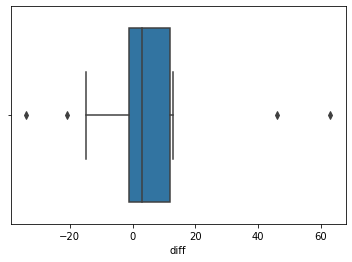

In [38]:
sns.boxplot(df['diff'])

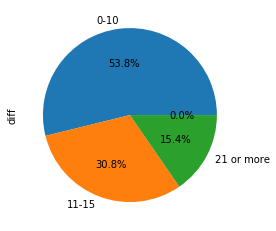

In [40]:
pd.cut(df['diff'], bins = [0,11,16,21,100], labels = ['0-10', '11-15', '16-20', '21 or more']).value_counts().plot("pie", autopct='%1.1f%%')

**Inference:**
    - Data suggests highest probability is for both teams having different between 0-10. and next is 11-15. we can probably go with 0-10 as our option.

# Q5. Consider a new metric called "Bowler Lethality Score(BLS)" which can be computed for every bowler in a match using the formula : 
[(# of wickets taken in the match + # of dot balls bowled in a match - (# of boundary runs given/# of boundaries hit off the bowler in the match))/(total balls bowled by the bowler in the match)] 

The higher the BLS, the better the bowler's performance. According to formula given and your analysis, which bowler from both CSK and MI would have the higher BLS? 
[NOTE: The BLS should be computed only for bowlers who bowl more than 1 over in a match]

    - Deepak Chahar or Ravindra Jadega
    - Jasprit Bunrah or Krunal Pnadya
    - Trent Boult or Rahul Chahr
    - Other

In [87]:
#get all matches played b/n rr and MI - calculated already 
rr_mi_all

#number of wickets taken by each bowler in a match
rr_mi_wickets_all = rr_mi_all[rr_mi_all.player_dismissed.notnull()]

#count wickets per bowler
rr_mi_wickets_count = rr_mi_wickets_all.groupby(['match_id', 'bowler'])['player_dismissed'].count().reset_index()
# rr_mi_wickets_count.rename(column={'player_dismissed', 'totak_wickets_per_match'})




,match_id,bowler,player_dismissed
0,67,A Nehra,2
1,67,DS Kulkarni,1
2,67,JDP Oram,1
3,67,Joginder Sharma,2
4,67,M Muralitharan,2
5,67,MA Khote,2
6,67,MS Gony,1
7,67,P Amarnath,1
8,96,DJ Bravo,2
9,96,DS Kulkarni,3


In [90]:
#counting number of dot balls i,e where no wicket is taken neither runs are taken

#total balls bowled by the bowler
rr_mi_tot_balls = rr_mi_all.groupby(['match_id', 'bowler'])['total_runs'].count().reset_index()
rr_mi_tot_balls = rr_mi_tot_balls.rename(columns={'total_runs': 'total_balls'})

#total dots bowled by the bowler
rr_mi_dots = rr_mi_all[(rr_mi_all.total_runs==0)|(rr_mi_all.player_dismissed==np.nan)]
rr_mi_tot_dots = rr_mi_dots.groupby(['match_id', 'bowler'])['total_runs'].count().reset_index()
rr_mi_tot_dots = rr_mi_tot_dots.rename(columns={'total_runs': 'total_dots'})

rr_mi_dots_all = rr_mi_tot_balls.merge(rr_mi_tot_dots, how='left', on=['match_id', 'bowler'])


In [98]:
## of boundaries given by the bowler
rr_mi_46 = rr_mi_all[rr_mi_all.batsman_runs.isin([4,6])]
rr_mi_46_boundaries_count = rr_mi_46.groupby(['match_id'])['batsman_runs'].count().reset_index()
rr_mi_46_boundaries_count = rr_mi_46_boundaries_count.rename(columns = {'batsman_runs' : 'number_of_boundaries'})

# of boundaries given by bowler 
rr_mi_46_bowler_count = rr_mi_46.groupby(['match_id', 'bowler'])['batsman_runs'].count().reset_index()
rr_mi_46_bowler_count = rr_mi_46_bowler_count.rename(columns = {'batsman_runs' : 'number_of_boundaries_off_bowler'})


rr_mi_bowler_boundaries_count = rr_mi_46_bowler_count.merge(rr_mi_46_boundaries_count, on='match_id')

In [105]:
#of overs played by bowler
rr_mi_all_overs = rr_mi_all.groupby(['match_id', 'bowler'])['over'].nunique().reset_index()


In [107]:
rr_mi_wickets_count.head()

,match_id,bowler,player_dismissed
0,67,A Nehra,2
1,67,DS Kulkarni,1
2,67,JDP Oram,1
3,67,Joginder Sharma,2
4,67,M Muralitharan,2


In [109]:
bowlers = rr_mi_wickets_count.merge(rr_mi_tot_balls, on=['match_id', 'bowler']).merge(rr_mi_tot_dots, on=['match_id', 'bowler'] ).merge(rr_mi_bowler_boundaries_count, on=['match_id','bowler']).merge(rr_mi_all_overs, on=['match_id', 'bowler']).merge(rr_mi_tot_dots,  on=['match_id', 'bowler'])

In [112]:
bowlers['bls'] =( bowlers.player_dismissed +bowlers.total_dots_x - (bowlers.number_of_boundaries/bowlers.number_of_boundaries_off_bowler))/bowlers.total_balls


Index(['match_id', 'bowler', 'player_dismissed', 'total_balls', 'total_dots_x',
       'number_of_boundaries_off_bowler', 'number_of_boundaries', 'over',
       'total_dots_y', 'bls'],
      dtype='object')

In [117]:
#only over > 1
bowlers_bls = bowlers[bowlers.over>1]

bowlers_bls.groupby(['bowler'])['bls'].mean().sort_values(ascending=False)

bowler
M de Lange           0.259615
P Kumar              0.233333
DE Bollinger         0.217837
MM Patel             0.212381
BW Hilfenhaus        0.164589
SN Thakur            0.160000
IC Pandey            0.152227
S Badree             0.144000
RP Singh             0.130000
P Negi               0.114583
J Behrendorff        0.106667
P Suyal              0.105263
JDP Oram             0.102885
KH Pandya            0.082354
CRD Fernando         0.076923
Mustafizur Rahman    0.074534
DL Chahar            0.063302
DS Kulkarni          0.056408
S Randiv             0.047619
Z Khan               0.040000
MG Johnson           0.034615
L Balaji             0.033333
MJ McClenaghan       0.033083
P Amarnath           0.027778
A Nehra              0.026735
AS Rajpoot           0.000000
A Flintoff          -0.013889
MM Sharma           -0.016715
SR Watson           -0.026667
JA Morkel           -0.062256
ST Jayasuriya       -0.062500
S Tyagi             -0.067008
J Yadav             -0.070175
HH 

**INference:Pandya has higher BLS than others**